## 目录

- [第一节内容](#section1)
- [第二节内容](#section2)
- [第三节内容](#section3)
- [第四节内容](#section4)
- [第三节内容](#section5)
- [第三节内容](#section6)

...

## 生成数据<a id="section1"></a>

这是第一节的内容。

...

## 读取数据<a id="section2"></a>


...

## 构建模型<a id="section3"></a>

这是第三节的内容。

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt 
import random

In [2]:
#定义样本大小，特征数量及真实参数
num_input = 2
num_example = 1000
true_w = [2, -3.4]
true_b = 4.2

#设置随机数种子，有利复现
torch.manual_seed(1)
#生成服从标准正态分布的特征
features = torch.randn((num_example, num_input))
#根据真实公式生成标签
labels = true_w[0]*features[:, 0] + true_w[1]*features[:, 1] + true_b
#添加随机噪声
labels += torch.randn(num_example)*0.01

torch.Size([1000])


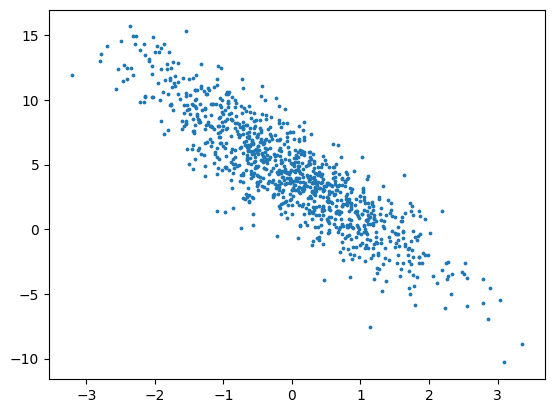

In [3]:
plt.scatter(features[:, 1], labels, s=3)   

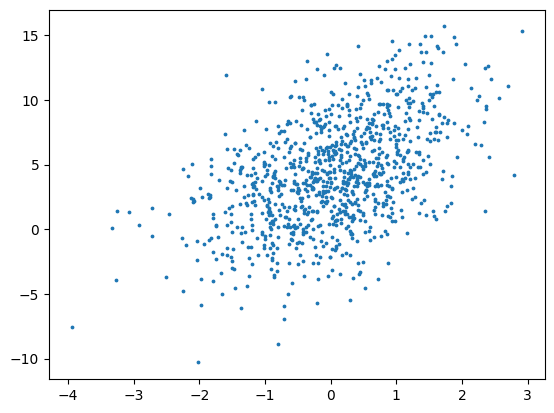

In [4]:
plt.scatter(features[:, 0], labels, s=3)  

In [5]:
random.seed(0)
def data_iter(batch_size, features, labels):
    """
    定义获取batch的迭代器，乱序返回，\\
    不丢弃最后一个小于batch_size的batch
    """
    num_example = len(features)
    indexs = list(range(len(features)))   
    random.shuffle(indexs)                #乱序索引                 
    for i in range(0, num_example, batch_size):
        #获取每一batch索引列表，最后一个batch取剩余数据
        j = torch.tensor(indexs[i: min(num_example, batch_size+i)], dtype=torch.int32)
        yield features.index_select(0, j), labels.index_select(0, j), len(j)

In [6]:
#随机初始化参数
w = torch.tensor(np.random.normal(0, 0.01, (num_input, 1)), dtype=torch.float32, requires_grad=True)
b = torch.zeros(1, dtype=torch.float32, requires_grad=True)


def linreg(X, w, b):                  #定义模型
    return torch.matmul(X, w) + b

def squred_loss(y_hat, y):            #均方误差损失函数
    return (y_hat - y.reshape(y_hat.size()))**2/2         

def sgd(params, lr, batch_size):
    with torch.no_grad():         #更新参数, 不累积梯度
        for param in params: 
            param -= lr * param.grad / batch_size     #更新参数
            param.grad.zero_()    #梯度清零

In [7]:
#设定参数
lr = 0.03
num_epochs = 10
batch_size = 100
net = linreg
loss = squred_loss
loss_list = []
for epoch in range(num_epochs):
    """首先计算误差，求和后反向传播求梯度，再更新参数 """
    for X, y, true_size in data_iter(batch_size, features, labels):

        l = loss(net(X, w, b), y)
        l.sum().backward()
        sgd([w, b], lr, true_size)
    with torch.no_grad():             #在全体数据上计算损失，不更新梯度
        train_loss = loss(net(features, w, b), labels).mean()
        loss_list.append(train_loss)
        print("epoch %d, loss: %f"%(epoch+1, train_loss))


epoch 1, loss: 9.248938
epoch 2, loss: 4.806280
epoch 3, loss: 2.501017
epoch 4, loss: 1.302914
epoch 5, loss: 0.679542
epoch 6, loss: 0.354809
epoch 7, loss: 0.185516
epoch 8, loss: 0.097125
epoch 9, loss: 0.050921
epoch 10, loss: 0.026739


In [8]:
print(w.tolist(), "\n", true_w)
print(b, "\n", true_b)

[[1.9239046573638916], [-3.2982046604156494]] 
 [2, -3.4]
tensor([4.0143], requires_grad=True) 
 4.2
